<a href="https://colab.research.google.com/github/amrutha2508/FashionCLIP/blob/main/fclip1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ak0810","key":"96d40321063333ce80739f23c3a3722b"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install -q kaggle

In [4]:
!kaggle datasets list -s "fashion"

ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
zalando-research/fashionmnist                                   Fashion MNIST                                        72114846  2017-12-07 00:54:20.537000         230572       2937  0.85294116       
bhanupratapbiswas/fashion-products                              Fashion Products                                        20181  2023-06-12 03:56:26.747000           7830        111  1.0              
paramaggarwal/fashion-product-images-dataset                    Fashion Product Images Dataset                    24771215740  2019-03-14 18:57:43.307000          47396        716  1.0              
param

In [5]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small
License(s): MIT


In [6]:
!unzip -q /content/fashion-product-images-small.zip

In [ ]:
import os

folder_path = "/content/myntradataset/images"  # Replace with your actual path

# Count files only (not subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Total number of files: {file_count}")


Total number of files: 44441


In [ ]:
folder_path = "/content/images"  # Replace with your actual path

# Count files only (not subdirectories)
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Total number of files: {file_count}")


Total number of files: 44441


In [ ]:
import pandas as pd
df = pd.read_csv('/content/myntradataset/styles.csv',on_bad_lines="skip")

In [ ]:
df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [ ]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
df.sort_values(by = "id").head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
12894,1163,Men,Apparel,Topwear,Tshirts,Blue,Summer,2011.0,Sports,Nike Sahara Team India Fanwear Round Neck Jersey
12617,1164,Men,Apparel,Topwear,Tshirts,Blue,Winter,2015.0,Sports,Nike Men Blue T20 Indian Cricket Jersey
16344,1165,Men,Apparel,Topwear,Tshirts,Blue,Summer,2013.0,Sports,Nike Mean Team India Cricket Jersey
9203,1525,Unisex,Accessories,Bags,Backpacks,Navy Blue,Fall,2010.0,Casual,Puma Deck Navy Blue Backpack
33206,1526,Unisex,Accessories,Bags,Backpacks,Black,Fall,2010.0,Sports,Puma Big Cat Backpack Black


In [ ]:
import os

folder_path = "/content/myntradataset/images"  # replace with your path

# Get all filenames (only files, not folders)
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

print(f"Total images: {len(image_files)}")
print("First 5 image filenames:", image_files[:5])


Total images: 44441
First 5 image filenames: ['9908.jpg', '9589.jpg', '5606.jpg', '57560.jpg', '37679.jpg']


In [ ]:
image_ids = [int(os.path.splitext(f)[0]) for f in image_files]

In [ ]:
image_ids.sort()

In [ ]:
# Check if all df["id"] values are in A
if set(df['id'].tolist()).issubset(set(image_ids)):
    print("✅ All IDs in the column are present in list A.")
else:
    print("❌ Some IDs in the column are NOT in list A.")

❌ Some IDs in the column are NOT in list A.


In [ ]:
len(image_ids)

44441

In [ ]:
df.shape

(44424, 10)

In [ ]:
df['masterCategory'].value_counts()

,count
masterCategory,
Apparel,21397
Accessories,11274
Footwear,9219
Personal Care,2403
Free Items,105
Sporting Goods,25
Home,1


In [ ]:
# Filter rows where 'id' is NOT in list A
missing_rows = df[~df["id"].isin(image_ids)]
missing_rows

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
6695,39403,Men,Apparel,Topwear,Shirts,Black,Summer,2014.0,Casual,U.S. Polo Assn. Men Black Tailored Fit Casual ...
16194,39410,Men,Apparel,Topwear,Shirts,Cream,Summer,2014.0,Casual,U.S. Polo Assn. Men Cream-Coloured Tailored Fi...
32309,39401,Men,Apparel,Bottomwear,Jeans,Blue,Winter,2016.0,Casual,U.S. Polo Assn. Denim Co. Men Blue Slim Straig...
36381,39425,Men,Apparel,Topwear,Tshirts,Red,Spring,2013.0,Casual,U.S. Polo Assn. Men Red Polo T-Shirt
40000,12347,Men,Apparel,Topwear,Suits,Red,Winter,2010.0,Casual,Fastrack Men Red Manhattan Regular Fit Solid F...


In [ ]:
# Keep only rows where 'id' is in list A
df = df[df["id"].isin(image_ids)]
df.shape

(44419, 10)

In [ ]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
df['subCategory'].value_counts()

,count
subCategory,
Topwear,15398
Shoes,7343
Bags,3055
Bottomwear,2693
Watches,2542
Innerwear,1808
Jewellery,1079
Eyewear,1073
Fragrance,1011


In [ ]:
df.groupby('subCategory')['masterCategory']

In [ ]:
df[df['subCategory']=="Perfumes"]['masterCategory'].value_counts()

,count
masterCategory,
Personal Care,5
Accessories,1


In [ ]:
df[df['subCategory']=="Perfumes"]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
10171,44030,Men,Personal Care,Perfumes,Perfume and Body Mist,Orange,Spring,2017.0,Casual,dunhill Men Pursuit Perfume
11900,27329,Women,Personal Care,Perfumes,Perfume and Body Mist,Orange,Spring,2017.0,Casual,Jovan Women Musk Perfume
20016,36710,Men,Accessories,Perfumes,Perfume and Body Mist,Red,Spring,2017.0,Casual,Ferrari Men Perfume
28547,27331,Women,Personal Care,Perfumes,Perfume and Body Mist,Black,Spring,2017.0,Casual,Jovan Women Black Musk Perfume
30932,27330,Women,Personal Care,Perfumes,Perfume and Body Mist,White,Spring,2017.0,Casual,Jovan Women White Musk Perfume
38121,44017,Men,Personal Care,Perfumes,Perfume and Body Mist,Grey,Spring,2017.0,Casual,Boss Men Selection 50 ml Perfume


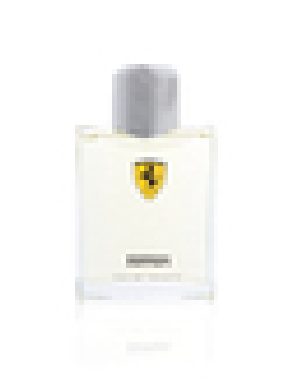

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
# Example path to an image in your dataset
id = str(36710)  # adjust if column name is different
image_path = "/content/myntradataset/images/"+id+".jpg"
# Open and display the image
img = Image.open(image_path)

plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
# Group by subCategory and count unique masterCategory entries
subcat_master_counts = df.groupby('subCategory')['masterCategory'].nunique()

# Filter to subCategories that appear in more than one masterCategory
multi_master_subcats = subcat_master_counts[subcat_master_counts > 1]

print(multi_master_subcats)
# socks and perfumes are present in 2 categories

subCategory
Perfumes    2
Socks       2
Name: masterCategory, dtype: int64


In [ ]:
df['articleType'].value_counts()

,count
articleType,
Tshirts,7066
Shirts,3215
Casual Shoes,2845
Watches,2542
Sports Shoes,2036
...,...
Hair Accessory,1
Cushion Covers,1
Mens Grooming Kit,1


In [ ]:
cat = ['Home Furnishing','Vouchers',"Sports Accessories","Beauty Accessories","Wristbands","Water Bottle","Umbrellas","Perfumes"]
df = df[~df['subCategory'].isin(cat)]

In [ ]:
import numpy as np
import textwrap
image_source_path = "/content/myntradataset/images/"

In [ ]:
df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [ ]:
df.rename(columns={'productDisplayName': 'caption'}, inplace=True)
df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'caption'],
      dtype='object')

In [ ]:
# split the data
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['subCategory'],
    random_state=42
)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['subCategory'],
    random_state=42
)

In [ ]:
train_df.shape,val_df.shape,test_df.shape

((35509, 10), (4439, 10), (4439, 10))

In [ ]:
# df['image_path'] = df['id'].apply(lambda x: image_source_path+str(x)+'.jpg')

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import textwrap
import os
from typing import List
import pandas as pd

def display_images(image_ids: List[int],
                            catalog_df: pd.DataFrame,
                            image_folder: str = image_source_path,
                            columns: int = 5,
                            width: int = 20,
                            height: int = 8,
                            max_images: int = 15,
                            font_size: int = 8,
                            text_wrap_length: int = 35):
    if image_ids is None or len(image_ids) == 0:
        print("No images to display.")
        return

    if len(image_ids) > max_images:
        print(f"Showing {max_images} images of {len(image_ids)}:")
        image_ids = image_ids[:max_images]

    n_rows = int(len(image_ids) / columns + 1)
    height = max(height, n_rows * 2)
    fig = plt.figure(figsize=(width, height))

    for i, img_id in enumerate(image_ids):
        image_filename = str(img_id) + ".jpg"
        image_path = os.path.join(image_folder, image_filename)

        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue

        img = Image.open(image_path)
        ax = plt.subplot(n_rows, columns, i + 1)
        ax.imshow(img)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.box(False)

        # Fetch product info from catalog
        row = catalog_df[catalog_df['id'] == img_id]
        display_text = ''

        if not row.empty:
            row = row.iloc[0]
            for col in ['subCategory', 'caption']:  # Add or change columns as needed
                val = str(row[col])
                text = textwrap.wrap(f"{col}: {val}", text_wrap_length)
                display_text += '\n'.join(text) + '\n'

        ax.text(0, -0.1, display_text.strip(),
                fontfamily='sans serif',
                fontsize=font_size,
                transform=ax.transAxes,
                verticalalignment='top')

    fig.tight_layout(h_pad=3, w_pad=0.1)
    return fig


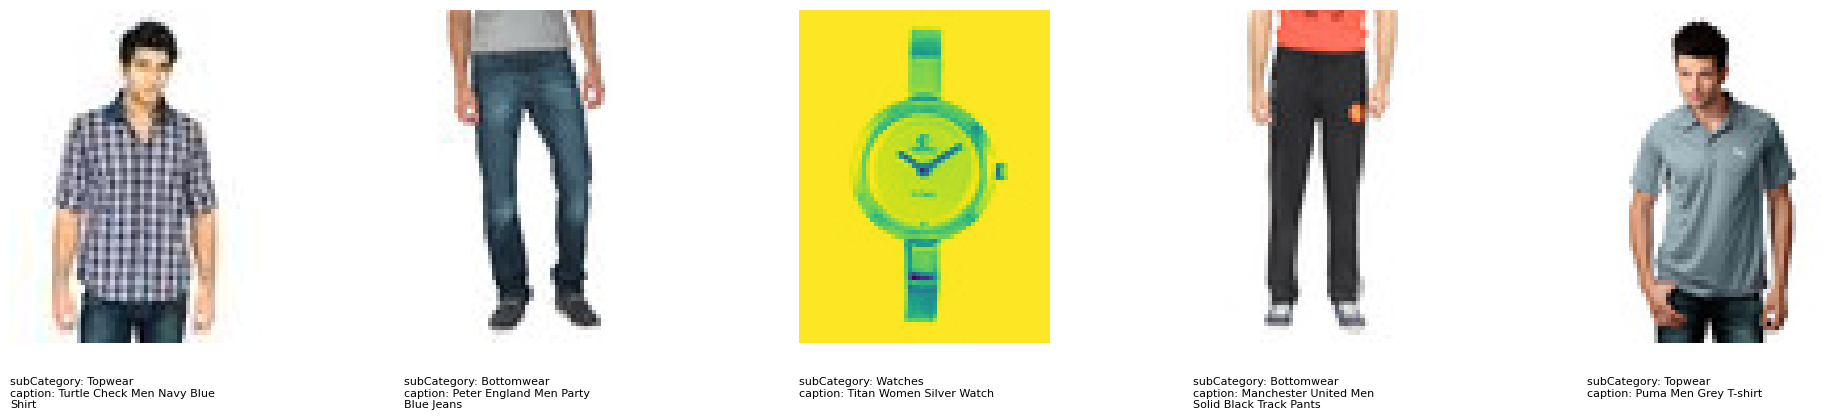

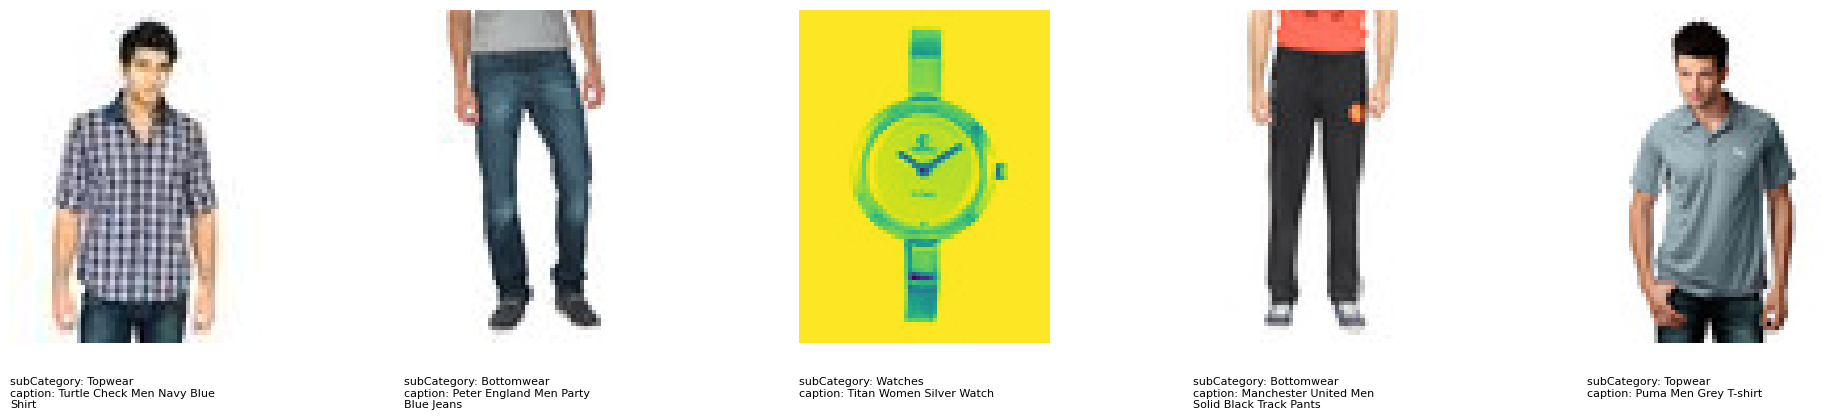

In [ ]:
display_images(df['id'].head().values,df[:10].head())

In [ ]:
print(df.head().iloc[0])

id                                           15970
gender                                         Men
masterCategory                             Apparel
subCategory                                Topwear
articleType                                 Shirts
baseColour                               Navy Blue
season                                        Fall
year                                        2011.0
usage                                       Casual
caption           Turtle Check Men Navy Blue Shirt
Name: 0, dtype: object


## Fashionclip data

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import textwrap
import os
import numpy as np
import pandas as pd
from typing import List, Tuple
import random

class FCLIPDataset:
    def __init__(self, image_source_path: str, catalog_df: pd.DataFrame):
        self.image_source_path = image_source_path
        self.catalog = catalog_df.reset_index(drop=True)

        # Convert id to string and add .jpg to form image filenames
        self.ids = np.array(self.catalog['id'].astype(str))
        self.images = np.array(self.catalog['id'].astype(str) + '.jpg')
        self.images_path = np.array([os.path.join(image_source_path, img) for img in self.images])
        self.captions = np.array(self.catalog['caption'])

        # Mapping from ID to index
        self.id_to_idx = {id_: idx for idx, id_ in enumerate(self.ids)}

    def __len__(self):
        return len(self.catalog)

    def __getitem__(self, idx):
        return {
            'id': self.ids[idx],
            'image_name': self.images[idx],
            'image_path': self.images_path[idx],
            'caption': self.captions[idx]
        }

    def display_products(self, ids: List[str], fields: Tuple[str] = ('subCategory', 'caption'), **kwargs):
        # Convert IDs to int or string to match DataFrame type
        image_ids = [str(i) for i in ids]
        return self._display_images(image_ids, fields=fields, **kwargs)

    def _display_images(self,
                        image_ids: List[str],
                        fields: Tuple[str] = ('subCategory', 'caption'),
                        columns: int = 5,
                        width: int = 20,
                        height: int = 8,
                        max_images: int = 15,
                        font_size: int = 8,
                        text_wrap_length: int = 35):

        if not image_ids or len(image_ids) == 0:
            print("No images to display.")
            return

        if len(image_ids) > max_images:
            print(f"Showing {max_images} images of {len(image_ids)}:")
            image_ids = image_ids[:max_images]

        n_rows = int(len(image_ids) / columns + 1)
        height = max(height, n_rows * 2)
        fig = plt.figure(figsize=(width, height))

        for i, img_id in enumerate(image_ids):
            image_filename = str(img_id) + ".jpg"
            image_path = os.path.join(self.image_source_path, image_filename)

            if not os.path.exists(image_path):
                print(f"Image not found: {image_path}")
                continue

            img = Image.open(image_path)
            ax = plt.subplot(n_rows, columns, i + 1)
            ax.imshow(img)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.box(False)

            # Fetch product info from catalog
            row = self.catalog[self.catalog['id'].astype(str) == str(img_id)]
            display_text = ''

            if not row.empty:
                row = row.iloc[0]
                for col in fields:
                    val = str(row[col]) if col in row else ''
                    text = textwrap.wrap(f"{col}: {val}", text_wrap_length)
                    display_text += '\n'.join(text) + '\n'

            ax.text(0, -0.1, display_text.strip(),
                    fontfamily='sans serif',
                    fontsize=font_size,
                    transform=ax.transAxes,
                    verticalalignment='top')

        fig.tight_layout(h_pad=3, w_pad=0.1)
        plt.close(fig)
        return fig

    def random_product_id(self):
        return random.choice(self.ids)


    def _retrieve_row(self, id: str):
        idx = self.id_to_idx.get(str(id))
        if idx is None:
            raise ValueError(f"ID '{id}' not found in dataset.")
        return self.catalog.iloc[idx]

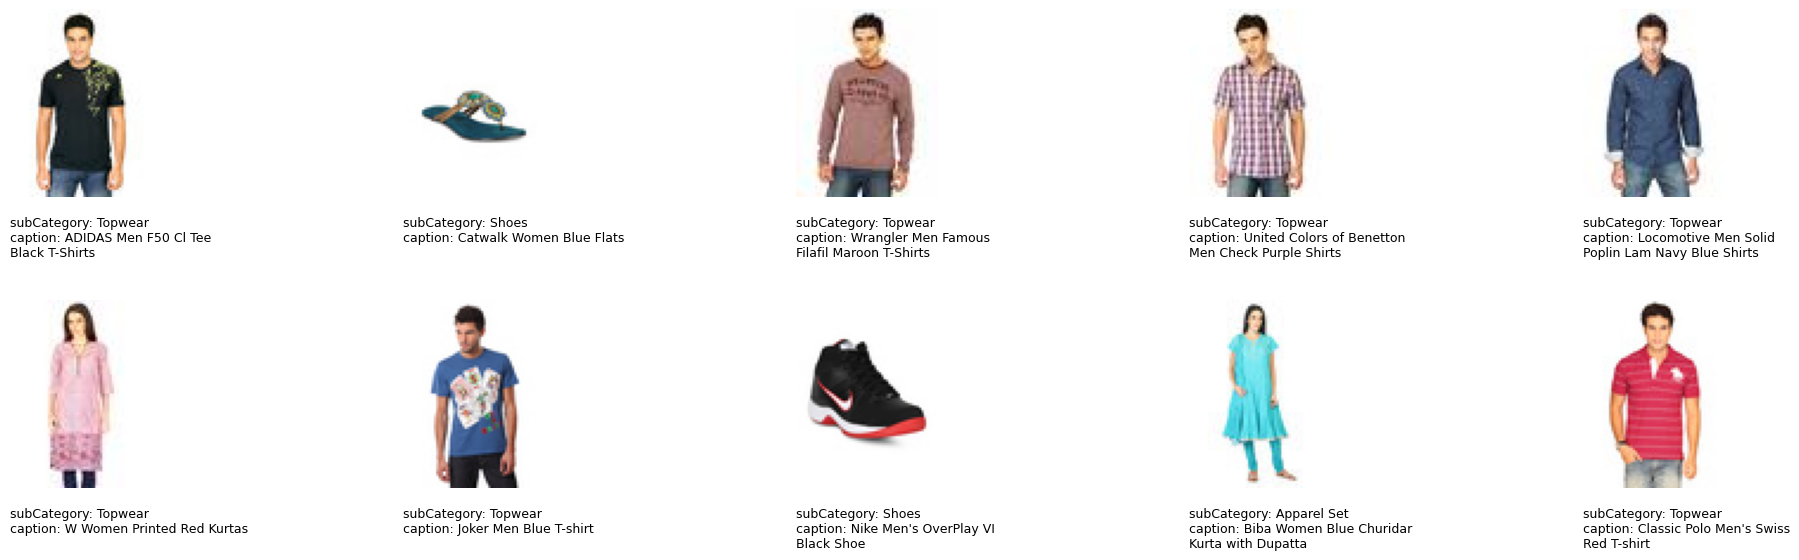

In [ ]:
# Instantiate the dataset
dataset = FCLIPDataset(image_source_path=image_source_path, catalog_df=train_df)

# Display 10 products
dataset.display_products(
    ids=train_df['id'].sample(10).tolist(),
    fields=('subCategory', 'caption'),  # you can also include 'gender', etc.
    columns=5,
    font_size=9
)


In [ ]:
dataset._retrieve_row('1642')

,2466
id,1642
gender,Men
masterCategory,Footwear
subCategory,Shoes
articleType,Sports Shoes
baseColour,White
season,Fall
year,2010.0
usage,Sports
caption,Reebok Men Winning Stride White Red


In [ ]:
!pip install annoy
!pip install validators
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp311-cp311-linux_x86_64.whl size=551658 sha256=964228aca363f407fd1291799d54ccba25023cd91635b9a036565245ed9f42d9
  Stored in directory: /root/.cache/pip/wheels/33/e5/58/0a3e34b92bedf09b4c57e37a63ff395ade6f6c1099ba59877c
Successfully built annoy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fs

## attention_map functions

In [ ]:
from PIL import Image
import numpy as np

# def pad_to_square(image, size=224):
#     original_size = image.size
#     ratio = float(size) / max(original_size)
#     new_size = tuple([int(x * ratio) for x in original_size])
#     new_im = Image.new("RGB", (size, size), color=(128, 128, 128))
#     new_im.paste(image.resize(new_size, Image.ANTIALIAS),
#                  ((size - new_size[0]) // 2, (size - new_size[1]) // 2))
#     return new_im

def pad_to_square(image, size=224):
    original_size = image.size
    ratio = float(size) / max(original_size)
    new_size = tuple([int(x * ratio) for x in original_size])

    new_im = Image.new("RGB", (size, size), color=(128, 128, 128))
    new_im.paste(
        image.resize(new_size, PILImage.Resampling.LANCZOS),
        ((size - new_size[0]) // 2, (size - new_size[1]) // 2)
    )
    return new_im

def generate_horizontal_masks(image_size, pixel_size, channels=3):
    base_mask = np.ones((image_size, image_size, channels))
    masks = []
    n_pixels = image_size // pixel_size + 1
    for i in range(1, n_pixels):
        for j in range(i + 1, n_pixels):
            m = base_mask.copy()
            m[:min(i * pixel_size, image_size), :] = 0
            m[min(j * pixel_size, image_size):, :] = 0
            masks.append(m)
    return masks

def generate_vertical_masks(image_size, pixel_size, channels=3):
    base_mask = np.ones((image_size, image_size, channels))
    masks = []
    n_pixels = image_size // pixel_size + 1
    for i in range(0, n_pixels):
        for j in range(i + 1, n_pixels):
            m = base_mask.copy()
            m[:, :min(i * pixel_size, image_size)] = 0
            m[:, min(j * pixel_size, image_size):] = 0
            masks.append(m)
    return masks

def generate_image_crops(image_path, image_size=224, pixel_size=10):
    assert pixel_size * 2 < image_size

    image = Image.open(image_path).convert("RGB")
    image = pad_to_square(image, size=image_size)
    gray = np.ones_like(np.array(image)) * 128

    image_crops = [image]
    masks = [np.ones_like(np.array(image))]

    h_masks = generate_horizontal_masks(image_size, pixel_size)
    v_masks = generate_vertical_masks(image_size, pixel_size)

    for m in h_masks + v_masks:
        m_bar = 1 - m
        masked_img = np.array(image) * m + gray * m_bar
        masked_img = masked_img.astype(np.uint8)
        image_crops.append(Image.fromarray(masked_img))
        masks.append(m)

    return image_crops, masks

# def display_heatmap(image, text, heatmap):
#     fig = plt.figure(figsize=(15, 30), facecolor='white')
#     ax1 = fig.add_subplot(131)
#     ax2 = fig.add_subplot(132)
#     ax3 = fig.add_subplot(133)

#     ax1.imshow(image)
#     ax2.imshow(heatmap, cmap='jet', interpolation='nearest')
#     ax3.imshow(np.asarray(image) / 255.0 * heatmap[..., None])

#     for ax in [ax1, ax2, ax3]:
#         ax.axis('off')

#     ax1.set_title('Input Image')
#     ax2.set_title(text)

#     return fig
def display_heatmap(image, text, heatmap):
    fig = plt.figure(figsize=(15, 30), facecolor='white')
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)

    ax1.imshow(image)
    ax2.imshow(heatmap, cmap='jet', interpolation='nearest')
    ax3.imshow((np.asarray(image) / 255.0) * heatmap)  # ✅ fixed here

    for ax in [ax1, ax2, ax3]:
        ax.axis('off')

    ax1.set_title('Input Image')
    ax2.set_title(text)
    plt.close(fig)
    return fig


## FashionCLIP

In [ ]:
import os
import torch
import numpy as np
from tqdm import tqdm
from typing import List, Union, Tuple
from torch.utils.data import DataLoader
# from fashion_clip.utils import get_cache_directory, _is_hugging_face_repo, _model_processor_hash
# from fashion_clip.utils import _download, file_sha256, display_images_from_s3, display_images_from_url, display_images
# import fashion_clip.attention_map as attention_map
import PIL
import hashlib
import random
from annoy import AnnoyIndex
import time
import json
import validators
from transformers import CLIPModel, CLIPProcessor
from PIL import Image  # ✅ for .open()

from datasets import Dataset, Image as HFImage  # 👈 avoid name clash

In [ ]:
#!pip uninstall -y clip

In [ ]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-8pyuxwbm
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-8pyuxwbm
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from math import ceil
import time
import numpy as np
from annoy import AnnoyIndex  # Make sure to install it if needed
from typing import List, Union, Tuple
from PIL import Image as PILImage

_MODELS = {
    "fashion-clip": "patrickjohncyh/fashion-clip",
}

class FashionCLIP:
    def __init__(self,
                 model_name: str = None,
                 model_type: str = "hf",  # used only if model is not passed directly
                 dataset=None,
                 model=None,
                 preprocess=None,
                 normalize=True,
                 approx=False,
                 auth_token=None):

        self.device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
        self.model_name = model_name
        self.model_type = model_type
        self.dataset = dataset
        self.approx = approx

        # Use provided model or load it
        if model is not None and preprocess is not None:
            self.model = model.to(self.device)
            self.preprocess = preprocess
        else:
            self.model, self.preprocess = self._load_model(model_name, model_type, device=self.device, auth_token=auth_token)
            self.model = self.model.to(self.device)

        if dataset is not None:
            self.image_vectors, self.textual_vectors = self._generate_vectors()
            assert self.image_vectors.shape == self.textual_vectors.shape

            if normalize:
                print('Normalizing Input Vectors...', end='')
                self.image_vectors = self.image_vectors / np.linalg.norm(self.image_vectors, ord=2, axis=-1, keepdims=True)
                self.textual_vectors = self.textual_vectors / np.linalg.norm(self.textual_vectors, ord=2, axis=-1, keepdims=True)
                print('Done!')

            if approx:
                print('Building Approx NN index...', end='')
                self.nn_index = AnnoyIndex(self.image_vectors.shape[1], "dot")
                for idx, v in enumerate(self.image_vectors):
                    self.nn_index.add_item(idx, v)
                self.nn_index.build(50)
                print('Done!')


    def _load_model(self,
                    name: str,
                    model_type: str = "hf",  # explicitly required
                    device: Union[str, torch.device] = "cuda" if torch.cuda.is_available() else "cpu",
                    auth_token=None):
        """
        Load a model from Hugging Face, OpenAI CLIP, or local directory (custom).
        """
        if model_type == "openai":
            import clip  # ensure clip is available
            if name not in clip.available_models():
                raise ValueError(f"'{name}' is not a valid OpenAI CLIP model. Available: {clip.available_models()}")
            model, preprocessing = clip.load(name, device=device)

        elif model_type == "hf":
            model_id = _MODELS.get(name, name)
            model = CLIPModel.from_pretrained(model_id, use_auth_token=auth_token)
            preprocessing = CLIPProcessor.from_pretrained(model_id, use_auth_token=auth_token)

        elif model_type == "custom":
            if not os.path.isdir(name):
                raise ValueError(f"Custom model path '{name}' must be a directory containing config and weights.")
            model = CLIPModel.from_pretrained(name)
            preprocessing = CLIPProcessor.from_pretrained(name)

        else:
            raise ValueError(f"Invalid model_type '{model_type}'. Use 'hf', 'openai', or 'custom'.")

        return model, preprocessing

    def _generate_vectors(self, cache=True):
        # generate image vectors
        image_vectors = self.encode_images(self.dataset.images_path, batch_size=32)
        # generate textual vectors
        #textual_vectors = self.encode_text(self.dataset.captions, batch_size=32)
        textual_vectors = self.encode_text(self.dataset.captions.tolist(), batch_size=32)
        # TODO: Implement some sort of caching mechanism?
        return image_vectors, textual_vectors


    def encode_images(self, images: Union[List[str], List[PILImage]], batch_size: int = 32):
        dataset = Dataset.from_dict({'image': images})
        if isinstance(images[0], str):
            dataset = dataset.cast_column('image', HFImage(decode=False))
        else:
            dataset = dataset.cast_column('image', HFImage())

        # def transform_fn(batch):
        #     pixel_values = self.preprocess(images=batch['image'], return_tensors='pt')['pixel_values']
        #     return {'pixel_values': pixel_values}
        # def transform_fn(batch):
        #     imgs = [PILImage.open(img["path"]).convert("RGB") for img in batch["image"]]
        #     pixel_values = self.preprocess(images=imgs, return_tensors="pt")["pixel_values"]
        #     return {"pixel_values": pixel_values}
        def transform_fn(batch):
            imgs = []
            for img in batch['image']:
                if isinstance(img, dict) and "path" in img:
                    # If image is still in dictionary form (from HF dataset)
                    img = PILImage.open(img["path"]).convert("RGB")
                elif isinstance(img, PILImage.Image):
                    img = img.convert("RGB")
                else:
                    raise ValueError("Unsupported image format")
                imgs.append(img)

            pixel_values = self.preprocess(images=imgs, return_tensors="pt")["pixel_values"]
            return {"pixel_values": pixel_values}

        dataset.set_transform(transform_fn)
        dataloader = DataLoader(dataset, batch_size=batch_size)
        self.model.eval()

        image_embeddings = []
        pbar = tqdm(total=len(dataloader), desc="Encoding images")

        with torch.no_grad():
            for batch in dataloader:
                pixel_values = batch['pixel_values'].to(self.device)
                outputs = self.model.get_image_features(pixel_values=pixel_values)
                image_embeddings.append(outputs.cpu().numpy())
                pbar.update(1)

        pbar.close()
        return np.concatenate(image_embeddings, axis=0)

    def encode_text(self, text: List[str], batch_size: int = 32):
        """
        Encode a list of texts using a Hugging Face CLIP model.
        """
        text = [str(t) for t in text]  # ensure all are strings
        dataset = Dataset.from_dict({'text': text})

        dataset = dataset.map(
            lambda el: self.preprocess(
                text=el['text'],
                return_tensors="pt",
                padding="max_length",
                truncation=True,
                max_length=77
            ),
            batched=True,
            remove_columns=['text']
        )

        dataset.set_format("torch")  # 👈 THIS is the fix

        dataloader = DataLoader(dataset, batch_size=batch_size)
        text_embeddings = []
        self.model.eval()

        pbar = tqdm(total=ceil(len(text) / batch_size), desc="Encoding text")
        with torch.no_grad():
            for batch in dataloader:
                batch = {k: v.to(self.device) for k, v in batch.items()}
                outputs = self.model.get_text_features(**batch)
                text_embeddings.append(outputs.cpu().numpy())
                pbar.update(1)

        pbar.close()
        return np.concatenate(text_embeddings, axis=0)

    def _cosine_similarity(self,
                           key_vectors: np.ndarray,
                           space_vectors: np.ndarray,
                           normalize: bool = True) -> np.ndarray:
        """
        Compute cosine similarity between key_vectors and space_vectors.

        Parameters:
        - key_vectors: np.ndarray of shape (N, D)
        - space_vectors: np.ndarray of shape (M, D)
        - normalize: if True, L2-normalizes vectors before computing similarity

        Returns:
        - similarity matrix of shape (N, M)
        """
        if normalize:
            key_vectors = key_vectors / np.linalg.norm(key_vectors, axis=-1, keepdims=True)
            space_vectors = space_vectors / np.linalg.norm(space_vectors, axis=-1, keepdims=True)

        return np.matmul(key_vectors, space_vectors.T)



    def _nearest_neighbours(self,
                            k: int,
                            key_vectors: Union[np.ndarray, List],
                            space_vectors: Union[np.ndarray, List],
                            normalize: bool = True,
                            debug: bool = False) -> np.ndarray:
        """
        Retrieve top-k nearest neighbors for given vectors.

        Parameters:
        - k: Number of neighbors to retrieve
        - key_vectors: Query vectors (shape: [N, D])
        - space_vectors: Target vectors (shape: [M, D]), only used if not using Annoy
        - normalize: Whether to normalize vectors before comparison
        - debug: If True, prints extra timing/logs

        Returns:
        - np.ndarray of indices (shape: [N, k])
        """

        # Convert to numpy arrays if needed
        if isinstance(key_vectors, list):
            key_vectors = np.array(key_vectors)
        if isinstance(space_vectors, list):
            space_vectors = np.array(space_vectors)

        t1 = time.time()

        if self.approx:
            if debug:
                print("Using Annoy (approximate nearest neighbors)")
            if normalize:
                key_vectors = key_vectors / np.linalg.norm(key_vectors, axis=-1, keepdims=True)
            nn = [self.nn_index.get_nns_by_vector(v, k, search_k=-1, include_distances=False) for v in key_vectors]
        else:
            if debug:
                print("Using exact cosine similarity")
            cosine_sim = self._cosine_similarity(key_vectors, space_vectors, normalize=normalize)
            nn = cosine_sim.argsort(axis=1)[:, -k:][:, ::-1]  # sort and reverse for top-k

        t2 = time.time()
        if debug:
            print(f"Elapsed time: {t2 - t1:.4f}s")

        return np.array(nn)
    def zero_shot_classification(self, images: Union[List[str], List[PILImage.Image]], text_labels: List[str], debug=False) -> List[str]:
        """
        Perform zero-shot image classification using text labels.

        Parameters:
        - images: list of image paths or PIL images
        - text_labels: list of possible class names as text
        - debug: if True, print similarity matrix

        Returns:
        - list of predicted labels, one per image
        """
        # Encode text labels
        text_vectors = self.encode_text(text_labels, batch_size=8)

        # Encode images
        image_vectors = self.encode_images(images, batch_size=8)

        # Compute similarity
        cosine_sim = self._cosine_similarity(image_vectors, text_vectors)

        if debug:
            print("Cosine Similarity Matrix:\n", cosine_sim)

        preds = np.argmax(cosine_sim, axis=-1)
        return [text_labels[i] for i in preds]
    def retrieval(self, queries: List[str], top_k: int = 10) -> np.ndarray:
        """
        Perform image retrieval given one or more text queries.

        Parameters:
        - queries: list of textual queries
        - top_k: number of similar images to retrieve for each query

        Returns:
        - np.ndarray of shape (len(queries), top_k) with image indices
        """
        text_vectors = self.encode_text(queries, batch_size=8)
        return self._nearest_neighbours(
            k=top_k,
            key_vectors=text_vectors,
            space_vectors=self.image_vectors
        )
    def _get_heatmap(self, image_path: str, text: str, pixel_size: int = 10, iterations: int = 2):
        """
        Generate a heatmap showing which parts of the image contribute most to the text similarity.

        Parameters:
        - image_path: path to the input image
        - text: text query
        - pixel_size: resolution of the masking blocks
        - iterations: number of refinement steps

        Returns:
        - score heatmap as np.ndarray
        - original unmasked image (PIL.Image)
        """
        images, masks = generate_image_crops(image_path, pixel_size=pixel_size)

        # Encode text
        text_vector = self.encode_text([text], batch_size=1)[0]
        text_vector = text_vector / np.linalg.norm(text_vector)

        # Encode masked images
        image_vectors = self.encode_images(images, batch_size=32)
        image_vectors = image_vectors / np.linalg.norm(image_vectors, axis=-1, keepdims=True)

        sims = []
        scores = []
        for e, m in zip(image_vectors, masks):
            sim = np.dot(e, text_vector)
            sims.append(sim)
            scores.append(sim * m)

        # Refine heatmap
        score = np.mean(np.clip(np.array(scores) - sims[0], 0, np.inf), axis=0)
        for _ in range(iterations):
            score = np.clip(score - np.mean(score), 0, np.inf)

        # Normalize between 0 and 1
        score = (score - np.min(score)) / (np.max(score) - np.min(score) + 1e-8)

        return np.asarray(score), images[0]

    def display_attention(self, image_path: str, query_text: str, pixel_size: int = 15, iterations: int = 5):
        """
        Generate and display attention heatmap for the image based on a query.

        Parameters:
        - image_path: path to the image
        - query_text: the text to compare against
        - pixel_size: masking resolution
        - iterations: refinement steps for heatmap
        """
        heatmap, image = self._get_heatmap(image_path, query_text, pixel_size, iterations)
        return display_heatmap(image, query_text, heatmap)




In [ ]:
dataset

In [ ]:

from transformers import CLIPModel, CLIPProcessor

model_name = "openai/clip-vit-base-patch32"  # or "patrickjohncyh/fashion-clip"
model = CLIPModel.from_pretrained(model_name)
preprocess = CLIPProcessor.from_pretrained(model_name)

fclip = FashionCLIP(model=model, preprocess=preprocess)

In [ ]:
train_df['id'].head().values

array([28219, 21695, 36745, 32513, 50609])

In [ ]:
sample_indices = [0, 1, 2, 3, 4]

sample_image_paths = [dataset.images_path[i] for i in sample_indices]
sample_captions = [dataset.captions[i] for i in sample_indices]

In [ ]:
sample_image_paths[0]

np.str_('/content/myntradataset/images/28219.jpg')

In [ ]:
sample_captions

['YARDLEY Men Adventure Deo',
 'Fossil Women Maroon Dial Watch ES2950',
 'Little Miss Girls Sunshine Red Clothing Set',
 'Franco Leone Men Brown Sandals',
 'Chromozome Men Grey Brief']

In [ ]:
# Encode sample images
image_embs = fclip.encode_images(sample_image_paths, batch_size=2)
print("Image embeddings shape:", image_embs.shape)

# Encode sample texts
text_embs = fclip.encode_text(sample_captions, batch_size=2)
print("Text embeddings shape:", text_embs.shape)

/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot locate reference to <class 'annoy.Annoy'>.
  StockPickler.save(self, obj, save_persistent_id)
/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot pickle <class 'annoy.Annoy'>: annoy.Annoy has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)
Parameter 'transform'=<function FashionCLIP.encode_images.<locals>.transform_fn at 0x7df315d19760> of the transform datasets.arrow_dataset.Dataset.set_format couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.
Encoding images: 100%|██

Image embeddings shape: (5, 512)


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Encoding text: 100%|██████████| 3/3 [00:00<00:00, 17.82it/s]

Text embeddings shape: (5, 512)


In [ ]:
image_embeddings = fclip.encode_images(images=["/path/to/image1.jpg", "/path/to/image2.jpg"], batch_size=16)

In [ ]:
!pip uninstall -y clip

Found existing installation: clip 0.2.0
Uninstalling clip-0.2.0:
  Successfully uninstalled clip-0.2.0


In [ ]:
# Encode a few captions and image paths
image_embs = fclip.encode_images(sample_image_paths)
text_embs = fclip.encode_text(sample_captions)

# Compute similarity matrix (shape: [#texts, #images])
sim_matrix = fclip._cosine_similarity(text_embs, image_embs)

print(sim_matrix.shape)  # e.g., (5, 5)
print(sim_matrix)

Encoding images: 100%|██████████| 1/1 [00:00<00:00, 24.82it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Encoding text: 100%|██████████| 1/1 [00:00<00:00, 42.88it/s]

(5, 5)
[[0.2859297  0.21276283 0.19010624 0.23042198 0.23990862]
 [0.15478046 0.34933043 0.20106909 0.20052911 0.13315585]
 [0.14495519 0.17371926 0.3362407  0.15767062 0.17253849]
 [0.16759071 0.19058865 0.16167176 0.33007807 0.20997465]
 [0.18531527 0.19160417 0.16334172 0.25677368 0.34931386]]


In [ ]:
# Encode 1 caption and find top 5 similar images
# Use your custom nearest neighbors method (top-3 example)
neighbors = fclip._nearest_neighbours(
    k=3,
    key_vectors=text_embs,           # query vectors (e.g., captions)
    space_vectors=image_embs,        # database vectors (e.g., sampled images)
    normalize=True,
    debug=True
)

print("Top-3 nearest neighbors (indices):")
print(neighbors)


Using exact cosine similarity
Elapsed time: 0.0043s
Top-3 nearest neighbors (indices):
[[0 4 3]
 [1 2 3]
 [2 1 4]
 [3 4 1]
 [4 3 1]]


In [ ]:
labels = ["sneakers", "t-shirt", "watch", "bag",'perfume']

predicted_labels = fclip.zero_shot_classification(sample_image_paths, labels, debug=True)
print(predicted_labels)

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Encoding images: 100%|██████████| 1/1 [00:00<00:00, 20.81it/s]

Cosine Similarity Matrix:
 [[0.13803048 0.16705675 0.17349629 0.17646715 0.20317681]
 [0.17241466 0.17641714 0.26733407 0.17191426 0.1932301 ]
 [0.17303497 0.22626314 0.18986535 0.187662   0.20247006]
 [0.19500661 0.17618401 0.19838974 0.19050242 0.1669541 ]
 [0.16242912 0.19894949 0.18997648 0.20756865 0.16443855]]
['perfume', 'watch', 't-shirt', 'watch', 'bag']


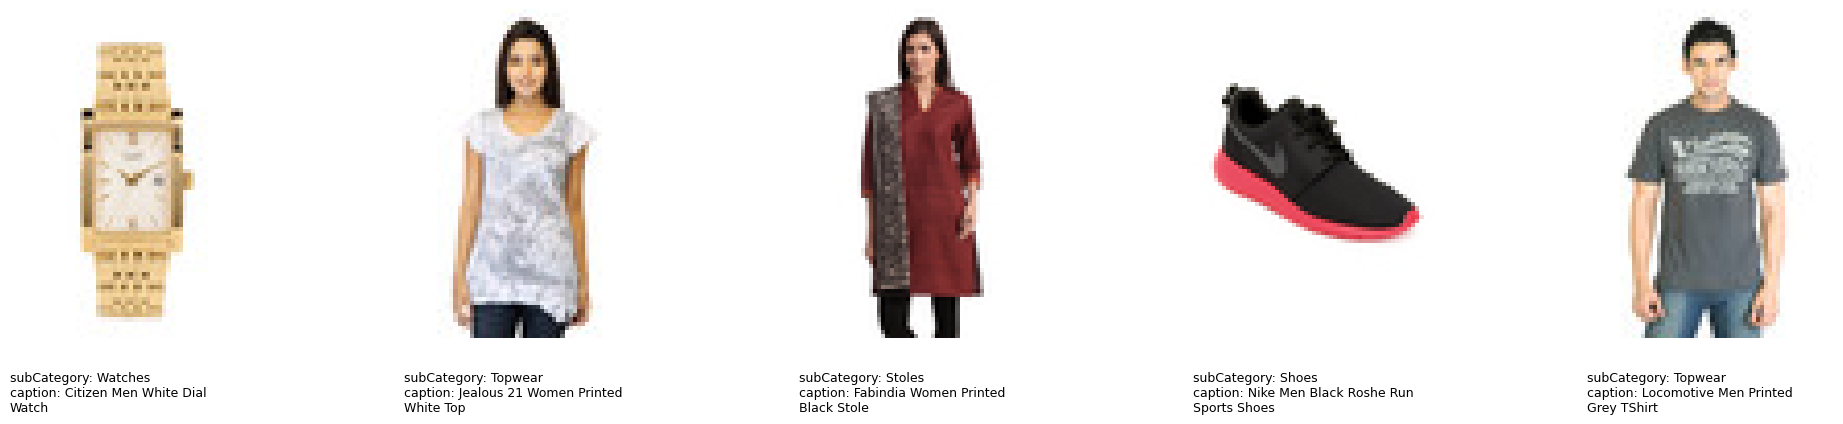

In [ ]:
dataset.display_products(
    ids=train_df['id'][15:20].tolist(),
    fields=('subCategory', 'caption'),  # you can also include 'gender', etc.
    columns=5,
    font_size=9
)

/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot locate reference to <class 'annoy.Annoy'>.
  StockPickler.save(self, obj, save_persistent_id)
/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot pickle <class 'annoy.Annoy'>: annoy.Annoy has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Encoding images: 100%|██████████| 16/16 [00:02<00:00,  5.83it/s]


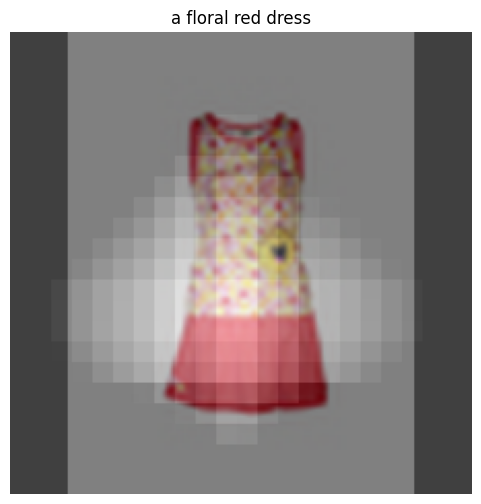

In [ ]:
text_prompt = "a floral red dress"
img_path = sample_image_paths[2]  # or any image path
heatmap, original_image = fclip._get_heatmap(img_path, text_prompt, pixel_size=10, iterations=2)

# Optional: visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.title(text_prompt)
plt.axis('off')
plt.show()

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Encoding images: 100%|██████████| 16/16 [00:02<00:00,  5.48it/s]


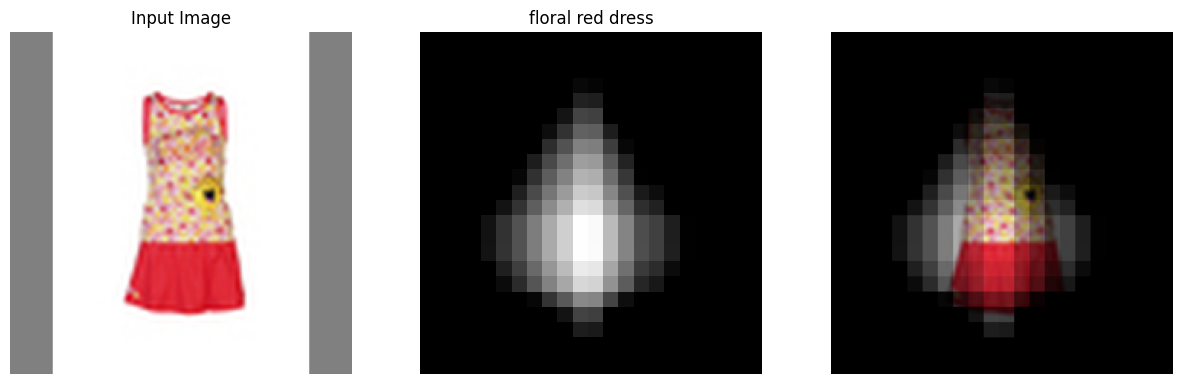

In [ ]:
query = "floral red dress"
img_path = sample_image_paths[2]

fclip.display_attention(img_path, query, pixel_size=10, iterations=3)

In [ ]:
train_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,caption
42738,28219,Men,Personal Care,Fragrance,Deodorant,Green,Spring,2017.0,Casual,YARDLEY Men Adventure Deo
10179,21695,Women,Accessories,Watches,Watches,Maroon,Winter,2016.0,Casual,Fossil Women Maroon Dial Watch ES2950
18601,36745,Girls,Apparel,Apparel Set,Clothing Set,Red,Summer,2012.0,Casual,Little Miss Girls Sunshine Red Clothing Set
17571,32513,Men,Footwear,Sandal,Sandals,Brown,Winter,2015.0,Casual,Franco Leone Men Brown Sandals
27984,50609,Men,Apparel,Innerwear,Briefs,Grey Melange,Summer,2016.0,Casual,Chromozome Men Grey Brief
...,...,...,...,...,...,...,...,...,...,...
25849,7597,Men,Footwear,Shoes,Sports Shoes,Red,Summer,2011.0,Sports,Nike Men's Backboard Red Black Shoe
21209,13607,Men,Apparel,Innerwear,Innerwear Vests,Grey,Summer,2016.0,Casual,Hanes Men Sleeveless Crew Grey Innerwear T-shirt
34411,17724,Men,Apparel,Topwear,Shirts,Grey,Fall,2011.0,Casual,Reid & Taylor Men Check Grey Shirt
27609,11380,Women,Apparel,Topwear,Tops,Black,Fall,2011.0,Casual,United Colors Of Benetton Women Light Winter B...


## training

### preparing training data

In [ ]:
train_df['caption'].apply(type).value_counts()

,count
caption,
<class 'str'>,35507
<class 'float'>,6


In [ ]:
from torch.utils.data import Dataset
from PIL import Image as PILImage

class CLIPTrainWrapper(Dataset):
    def __init__(self, base_dataset: FCLIPDataset, processor):
        self.base = base_dataset
        self.processor = processor

    def __len__(self):
        return len(self.base)

    def __getitem__(self, idx):
        sample = self.base[idx]
        image = PILImage.open(sample['image_path']).convert("RGB")
        #text = sample['caption']
        text = str(sample['caption'])
        inputs = self.processor(text=[text], images=image, return_tensors="pt", padding=True, truncation=True)
        return {k: v.squeeze(0) for k, v in inputs.items()}


In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=fclip.preprocess.tokenizer, return_tensors="pt")


In [ ]:
from torch.utils.data import DataLoader

train_dataset = FCLIPDataset(image_source_path=image_source_path, catalog_df=train_df)
val_dataset = FCLIPDataset(image_source_path=image_source_path, catalog_df=val_df)

train_loader = DataLoader(CLIPTrainWrapper(train_dataset, fclip.preprocess),
                          batch_size=32, shuffle=True, collate_fn=data_collator)

val_loader = DataLoader(CLIPTrainWrapper(val_dataset, fclip.preprocess),
                        batch_size=32, collate_fn=data_collator)


### custom model1

#### training data

In [ ]:
from tqdm import tqdm
from torch.optim import AdamW

model = fclip.model
device = fclip.device
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-6)

for epoch in range(3):
    print(f"\n🔁 Epoch {epoch + 1}")

    # --- Training ---
    model.train()
    train_loss = 0
    pbar = tqdm(train_loader, desc="🧠 Training", leave=False)

    for batch in pbar:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch, return_loss=True)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item()
        pbar.set_postfix(loss=f"{loss.item():.4f}")

    avg_train_loss = train_loss / len(train_loader)
    print(f"✅ Avg Train Loss: {avg_train_loss:.4f}")

    # --- Validation ---
    model.eval()
    val_loss = 0
    pbar = tqdm(val_loader, desc="🔍 Validating", leave=False)

    with torch.no_grad():
        for batch in pbar:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch, return_loss=True)
            loss = outputs.loss

            val_loss += loss.item()
            pbar.set_postfix(val_loss=f"{loss.item():.4f}")

    avg_val_loss = val_loss / len(val_loader)
    print(f"🔎 Avg Val Loss: {avg_val_loss:.4f}")



🔁 Epoch 1


✅ Avg Train Loss: 0.2401


🔎 Avg Val Loss: 0.1919

🔁 Epoch 2


✅ Avg Train Loss: 0.1480


🔎 Avg Val Loss: 0.1741

🔁 Epoch 3


✅ Avg Train Loss: 0.1175


🔎 Avg Val Loss: 0.1488


In [ ]:
save_path = "/content/clipmodel/"

# Save the model
model.save_pretrained(save_path)

# Save the processor (tokenizer + image processor)
fclip.preprocess.save_pretrained(save_path)

[]

In [ ]:
from transformers import CLIPModel, CLIPProcessor

save_path = "/content/clipmodel/"

# Load the model and processor
model1 = CLIPModel.from_pretrained(save_path)
preprocess1 = CLIPProcessor.from_pretrained(save_path)
fclip1 = FashionCLIP(model=model1, preprocess=preprocess1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp -r /content/clipmodel /content/drive/MyDrive/

In [ ]:
# Assuming you're using Hugging Face's CLIPModel
save_path = ""

# Save model
fclip.model.save_pretrained(save_path)

# Save the processor (tokenizer + image processor)
fclip.preprocess.save_pretrained(save_path)

### custom model2

In [ ]:

from transformers import CLIPModel, CLIPProcessor

model_name = "openai/clip-vit-base-patch32"  # or "patrickjohncyh/fashion-clip"
model = CLIPModel.from_pretrained(model_name)
preprocess = CLIPProcessor.from_pretrained(model_name)

fclip_model1 = FashionCLIP(model=model, preprocess=preprocess)

In [ ]:
def craft1(row):
    text_parts = []
    for col in ['gender', 'usage', 'season', 'baseColour', 'subCategory']:
        val = str(row[col])
        if val.lower() not in str(row['caption']).lower():
            text_parts.append(val)
    text = f"{' '.join(text_parts)}: {row['caption']}"
    return text

# Add new column to the dataframe
train_df['caption1'] = train_df.apply(craft1, axis=1)

In [ ]:
from transformers import DataCollatorWithPadding
data_collator1 = DataCollatorWithPadding(tokenizer=fclip_model1.preprocess.tokenizer, return_tensors="pt")

In [ ]:
# Create copies to avoid modifying original DataFrames
train_df_crafted1 = train_df.copy()
val_df_crafted1 = val_df.copy()

# Generate 'crafted_caption' for both sets
train_df_crafted1['crafted_caption'] = train_df_crafted1.apply(craft1, axis=1)
val_df_crafted1['crafted_caption'] = val_df_crafted1.apply(craft1, axis=1)

# Use the crafted caption as the main caption
train_df_crafted1['caption'] = train_df_crafted1['crafted_caption']
val_df_crafted1['caption'] = val_df_crafted1['crafted_caption']


train_dataset1 = FCLIPDataset(image_source_path=image_source_path, catalog_df=train_df_crafted1)
val_dataset1 = FCLIPDataset(image_source_path=image_source_path, catalog_df=val_df_crafted1)

train_loader1 = DataLoader(CLIPTrainWrapper(train_dataset1, fclip_model1.preprocess),
                          batch_size=32, shuffle=True, collate_fn=data_collator1)

val_loader1 = DataLoader(CLIPTrainWrapper(val_dataset1, fclip_model1.preprocess),
                        batch_size=32, shuffle=False, collate_fn=data_collator1)


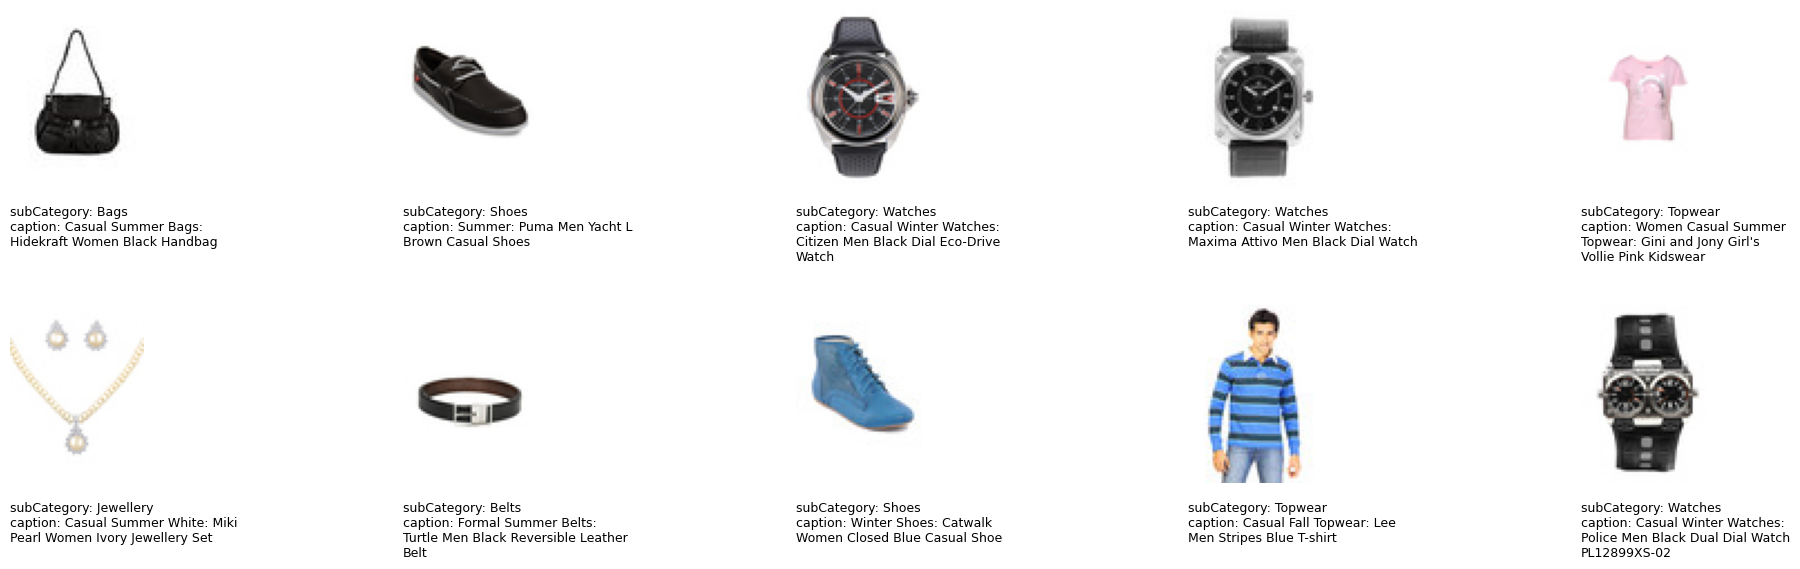

In [ ]:
dataset1.display_products(
    ids=train_df['id'].sample(10).tolist(),
    fields=('subCategory', 'caption'),
    columns=5,
    font_size=9
)

In [ ]:
device

'cuda'

In [ ]:
from tqdm import tqdm
from torch.optim import AdamW

model1 = fclip_model1.model
device = fclip_model1.device
model1.to(device)

optimizer = AdamW(model1.parameters(), lr=5e-6)

for epoch in range(3):
    print(f"\n🔁 Epoch {epoch + 1}")

    # --- Training ---
    model1.train()
    train_loss = 0
    pbar = tqdm(train_loader1, desc="🧠 Training", leave=False)

    for batch in pbar:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model1(**batch, return_loss=True)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item()
        pbar.set_postfix(loss=f"{loss.item():.4f}")

    avg_train_loss = train_loss / len(train_loader1)
    print(f"✅ Avg Train Loss: {avg_train_loss:.4f}")

    # --- Validation ---
    model1.eval()
    val_loss = 0
    pbar = tqdm(val_loader1, desc="🔍 Validating", leave=False)

    with torch.no_grad():
        for batch in pbar:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model1(**batch, return_loss=True)
            loss = outputs.loss

            val_loss += loss.item()
            pbar.set_postfix(val_loss=f"{loss.item():.4f}")

    avg_val_loss = val_loss / len(val_loader1)
    print(f"🔎 Avg Val Loss: {avg_val_loss:.4f}")



🔁 Epoch 1


✅ Avg Train Loss: 0.2326


🔎 Avg Val Loss: 0.1794

🔁 Epoch 2


✅ Avg Train Loss: 0.1424


🔎 Avg Val Loss: 0.1756

🔁 Epoch 3


🧠 Training:  74%|███████▍  | 824/1110 [20:04<06:50,  1.43s/it, loss=0.0631]

In [ ]:
model1

NameError: name 'model1' is not defined

## comparing model performance

In [ ]:
from datasets import Dataset

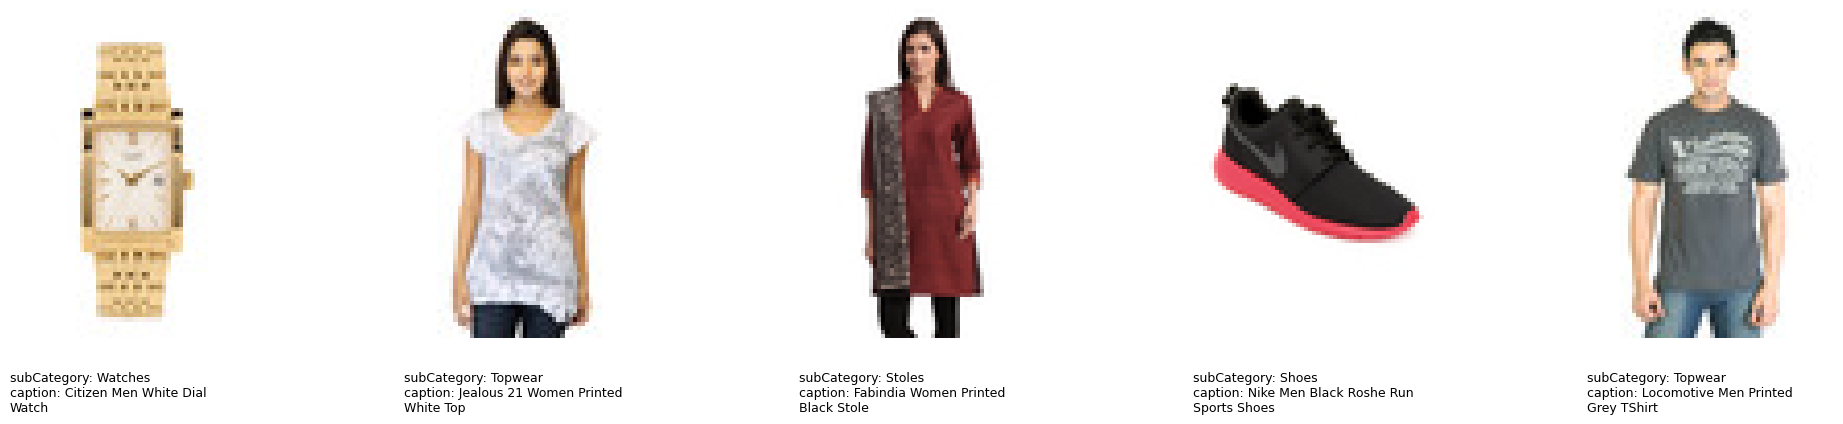

In [ ]:
dataset.display_products(
    ids=train_df['id'][15:20].tolist(),
    fields=('subCategory', 'caption'),  # you can also include 'gender', etc.
    columns=5,
    font_size=9
)

### 0. clip model

In [ ]:

from transformers import CLIPModel, CLIPProcessor

model_name = "openai/clip-vit-base-patch32"  # or "patrickjohncyh/fashion-clip"
model = CLIPModel.from_pretrained(model_name)
preprocess = CLIPProcessor.from_pretrained(model_name)

clip_model = FashionCLIP(model=model, preprocess=preprocess)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot locate reference to <class 'annoy.Annoy'>.
  StockPickler.save(self, obj, save_persistent_id)
/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot pickle <class 'annoy.Annoy'>: annoy.Annoy has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Encoding images: 100%|██████████| 16/16 [00:02<00:00,  6.79it/s]


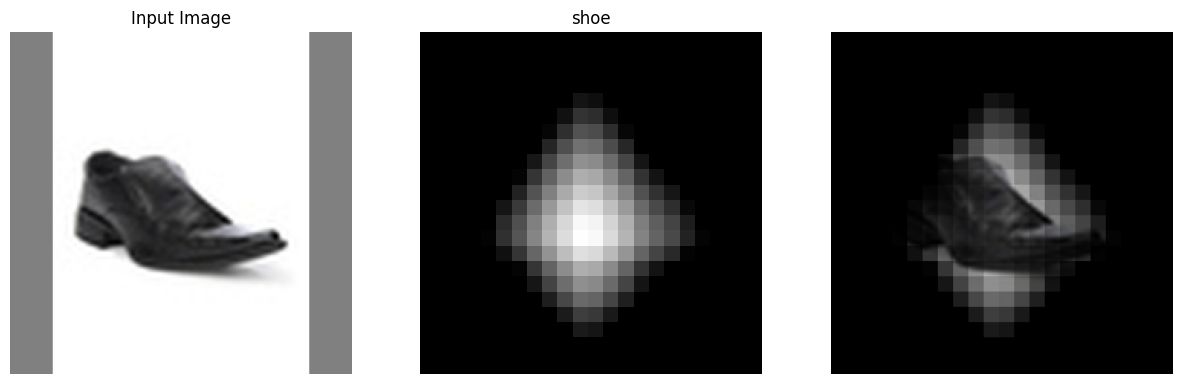

In [ ]:
query = "shoe"
img_path = sample_image_paths[2]

clip_model.display_attention(img_path, query, pixel_size=10, iterations=3)

In [ ]:
# Encode a few captions and image paths
image_embs = clip_model.encode_images(sample_image_paths)
text_embs = clip_model.encode_text(sample_captions)

# Compute similarity matrix (shape: [#texts, #images])
sim_matrix = clip_model._cosine_similarity(text_embs, image_embs)

print(sim_matrix.shape)  # e.g., (5, 5)
print(sim_matrix)

Encoding images: 100%|██████████| 1/1 [00:00<00:00, 24.85it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Encoding text: 100%|██████████| 1/1 [00:00<00:00, 43.73it/s]

(5, 5)
[[0.22461677 0.1144363  0.19134454 0.16241106 0.17351368]
 [0.16927662 0.30253688 0.13817629 0.21602929 0.17541732]
 [0.2457957  0.17733936 0.32971537 0.20598218 0.22923665]
 [0.25419497 0.25822636 0.20993638 0.30366093 0.20809704]
 [0.16159701 0.14498705 0.17904322 0.17250186 0.30805433]]


### 1.fashion_clip

In [ ]:
from transformers import CLIPModel, CLIPProcessor

model_name = "patrickjohncyh/fashion-clip"
model = CLIPModel.from_pretrained(model_name)
preprocess = CLIPProcessor.from_pretrained(model_name)

fclip_model = FashionCLIP(model=model, preprocess=preprocess)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot locate reference to <class 'annoy.Annoy'>.
  StockPickler.save(self, obj, save_persistent_id)
/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot pickle <class 'annoy.Annoy'>: annoy.Annoy has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Encoding images: 100%|██████████| 16/16 [00:02<00:00,  6.62it/s]


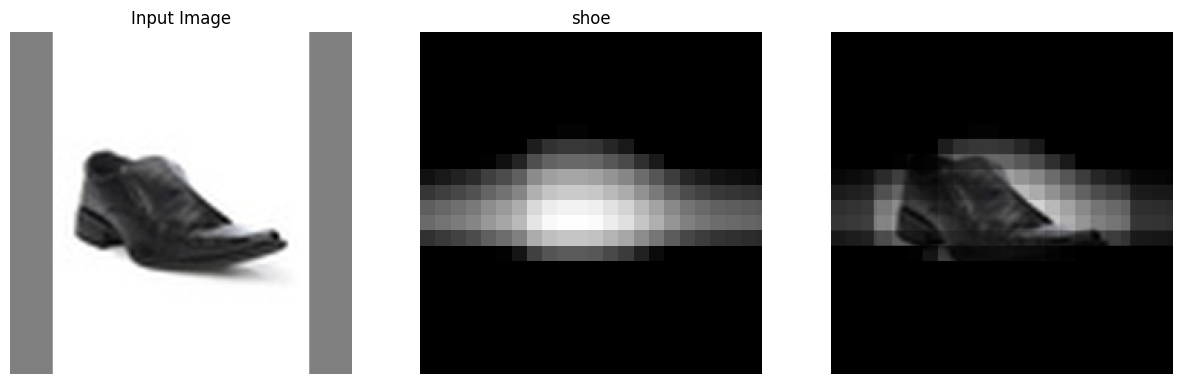

In [ ]:
query = "shoe"
img_path = sample_image_paths[2]

fclip_model.display_attention(img_path, query, pixel_size=10, iterations=3)

In [ ]:
# Encode a few captions and image paths
image_embs = fclip_model.encode_images(sample_image_paths)
text_embs = fclip_model.encode_text(sample_captions)

# Compute similarity matrix (shape: [#texts, #images])
sim_matrix = fclip_model._cosine_similarity(text_embs, image_embs)

print(sim_matrix.shape)  # e.g., (5, 5)
print(sim_matrix)

/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot locate reference to <class 'annoy.Annoy'>.
  StockPickler.save(self, obj, save_persistent_id)
/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot pickle <class 'annoy.Annoy'>: annoy.Annoy has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)
Encoding images: 100%|██████████| 1/1 [00:00<00:00, 24.23it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Encoding text: 100%|██████████| 1/1 [00:00<00:00, 17.22it/s]

(5, 5)
[[0.33608413 0.06548386 0.12941967 0.12325792 0.08088536]
 [0.03850432 0.35485536 0.00462645 0.13289756 0.04217062]
 [0.21141379 0.02966969 0.3531217  0.06447657 0.17089833]
 [0.11445914 0.20148677 0.1116915  0.33106464 0.0840739 ]
 [0.08567716 0.04383225 0.11509385 0.04465042 0.31582457]]


In [ ]:
# Encode 1 caption and find top 5 similar images
# Use your custom nearest neighbors method (top-3 example)
neighbors = fclip._nearest_neighbours(
    k=3,
    key_vectors=text_embs,           # query vectors (e.g., captions)
    space_vectors=image_embs,        # database vectors (e.g., sampled images)
    normalize=True,
    debug=True
)

print("Top-3 nearest neighbors (indices):")
print(neighbors)

### 2. custom model

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from transformers import CLIPModel, CLIPProcessor

save_path = "/content/drive/MyDrive/clip_models/clipmodel"

# Load the model and processor
model1 = CLIPModel.from_pretrained(save_path)
preprocess1 = CLIPProcessor.from_pretrained(save_path)
fclip_cust = FashionCLIP(model=model1, preprocess=preprocess1)

/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot locate reference to <class 'annoy.Annoy'>.
  StockPickler.save(self, obj, save_persistent_id)
/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot pickle <class 'annoy.Annoy'>: annoy.Annoy has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Encoding images: 100%|██████████| 16/16 [00:02<00:00,  6.87it/s]


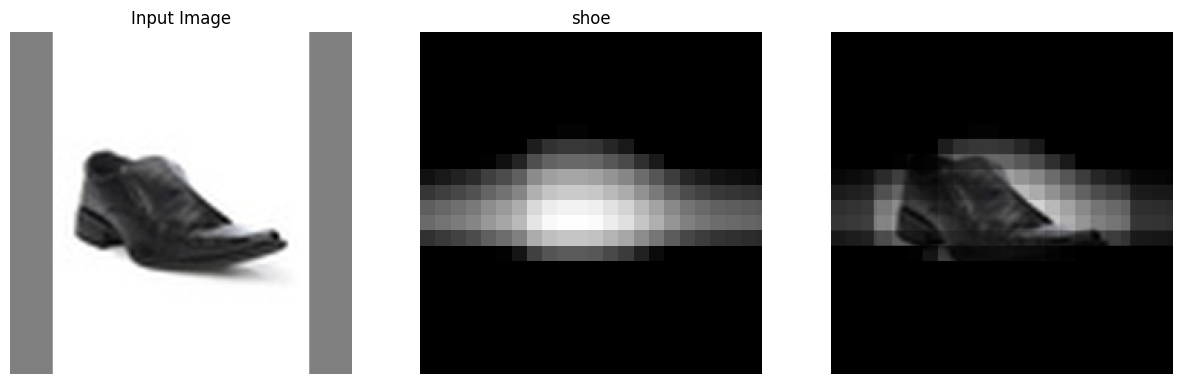

In [ ]:
query = "shoe"
img_path = sample_image_paths[2]

fclip_model.display_attention(img_path, query, pixel_size=10, iterations=3)

In [ ]:
# Encode a few captions and image paths
image_embs = fclip_cust.encode_images(sample_image_paths)
text_embs = fclip_cust.encode_text(sample_captions)

# Compute similarity matrix (shape: [#texts, #images])
sim_matrix = fclip_cust._cosine_similarity(text_embs, image_embs)

print(sim_matrix.shape)  # e.g., (5, 5)
print(sim_matrix)

/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot locate reference to <class 'annoy.Annoy'>.
  StockPickler.save(self, obj, save_persistent_id)
/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot pickle <class 'annoy.Annoy'>: annoy.Annoy has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)
Encoding images: 100%|██████████| 1/1 [00:00<00:00, 25.03it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Encoding text: 100%|██████████| 1/1 [00:00<00:00, 44.10it/s]

(5, 5)
[[0.3002031  0.11716106 0.11816604 0.12348463 0.09288315]
 [0.08739765 0.29668573 0.05584248 0.11900172 0.09024483]
 [0.19805354 0.10782375 0.30855715 0.12104844 0.14548358]
 [0.0866345  0.17893131 0.1040844  0.31975988 0.08793029]
 [0.07872647 0.04961427 0.126555   0.05762065 0.2802887 ]]


## Visualizing embeddings

In [ ]:
!pip install adjustText

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from typing import List
from adjustText import adjust_text  # install with `pip install adjustText` if not already

def plot_embedding_projection(image_embs: np.ndarray,
                              text_embs: np.ndarray,
                              captions: List[str],
                              perplexity: int = 2,
                              adjust_labels: bool = False,
                              title: str = "2D Projection of Image & Text Embeddings"):

    # 1. Stack embeddings
    all_embs = np.concatenate([image_embs, text_embs], axis=0)

    # 2. Create labels and captions
    labels = ['Image'] * len(image_embs) + ['Text'] * len(text_embs)
    product_labels = captions * 2  # same label for both types

    # 3. Reduce to 2D
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    embs_2d = tsne.fit_transform(all_embs)

    # 4. Plot points
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        x=embs_2d[:, 0],
        y=embs_2d[:, 1],
        hue=labels,
        palette=['red', 'blue'],
        s=100
    )

    # 5. Annotate labels
    texts = []
    for i, label in enumerate(captions):
        short_label = str(label)[:25]
        # Image point
        texts.append(plt.text(embs_2d[i, 0], embs_2d[i, 1], short_label, fontsize=7))
        # Text point
        texts.append(plt.text(embs_2d[i + len(captions), 0], embs_2d[i + len(captions), 1], short_label, fontsize=7))

    if adjust_labels:
        adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.legend(title="Type")
    plt.show()


In [ ]:
sample_captions,sample_image_paths

(['ADIDAS Unisex Pack of 3 Socks',
  'Avirate Cream & Olive Green Printed Dress',
  'Franco Leone Men Black Shoes',
  'Lino Perros Women Green Belt',
  'Mark Taylor Men Blue Striped Shirt'],
 [np.str_('/content/myntradataset/images/40121.jpg'),
  np.str_('/content/myntradataset/images/59983.jpg'),
  np.str_('/content/myntradataset/images/47206.jpg'),
  np.str_('/content/myntradataset/images/37049.jpg'),
  np.str_('/content/myntradataset/images/41660.jpg')])

/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot locate reference to <class 'annoy.Annoy'>.
  StockPickler.save(self, obj, save_persistent_id)
/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot pickle <class 'annoy.Annoy'>: annoy.Annoy has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)
Encoding images: 100%|██████████| 1/1 [00:00<00:00, 24.89it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Encoding text: 100%|██████████| 1/1 [00:00<00:00, 43.66it/s]


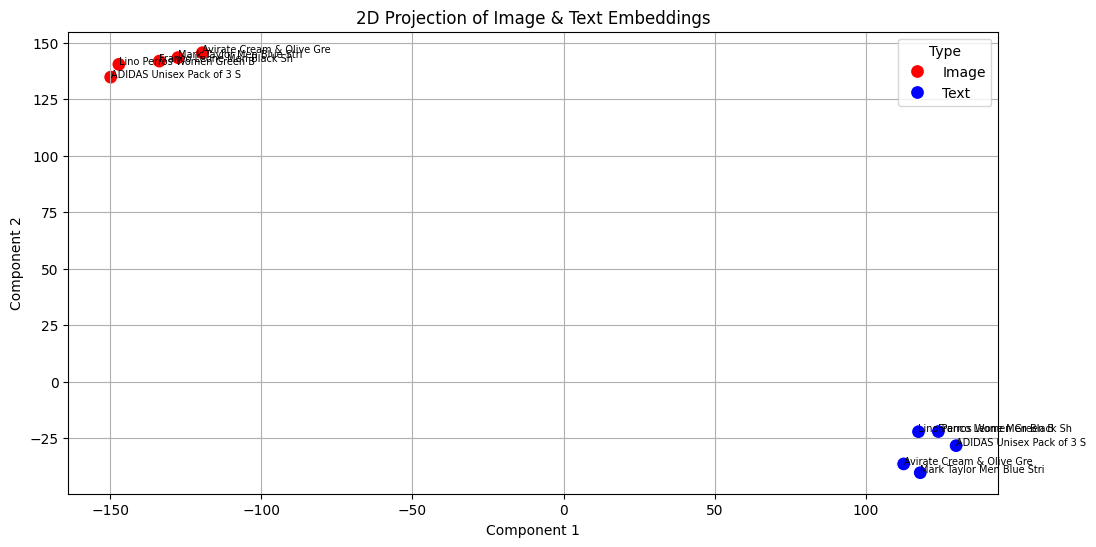

In [ ]:
image_embs0 = clip_model.encode_images(sample_image_paths)
text_embs0 = clip_model.encode_text(sample_captions)
plot_embedding_projection(image_embs0,text_embs0,sample_captions)

/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot locate reference to <class 'annoy.Annoy'>.
  StockPickler.save(self, obj, save_persistent_id)
/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot pickle <class 'annoy.Annoy'>: annoy.Annoy has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)
Encoding images: 100%|██████████| 1/1 [00:00<00:00, 11.54it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Encoding text: 100%|██████████| 1/1 [00:00<00:00, 41.85it/s]


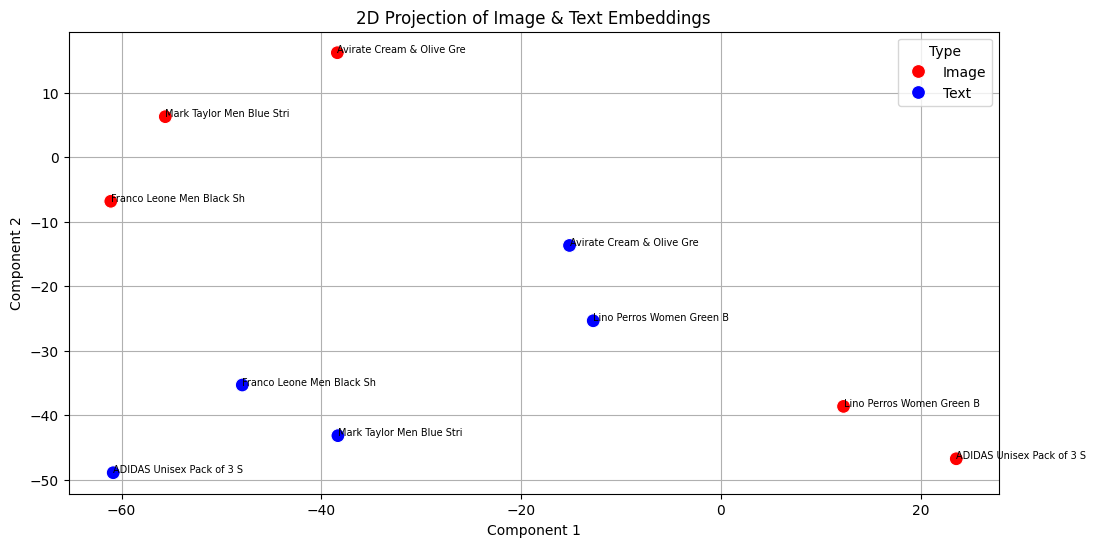

In [ ]:
image_embs1 = fclip_model.encode_images(sample_image_paths)
text_embs1 = fclip_model.encode_text(sample_captions)
plot_embedding_projection(image_embs1,text_embs1,sample_captions)

/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot locate reference to <class 'annoy.Annoy'>.
  StockPickler.save(self, obj, save_persistent_id)
/usr/local/lib/python3.11/dist-packages/dill/_dill.py:414: PicklingWarning: Cannot pickle <class 'annoy.Annoy'>: annoy.Annoy has recursive self-references that trigger a RecursionError.
  StockPickler.save(self, obj, save_persistent_id)
Encoding images: 100%|██████████| 1/1 [00:00<00:00, 17.46it/s]


Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Encoding text: 100%|██████████| 1/1 [00:00<00:00, 25.78it/s]


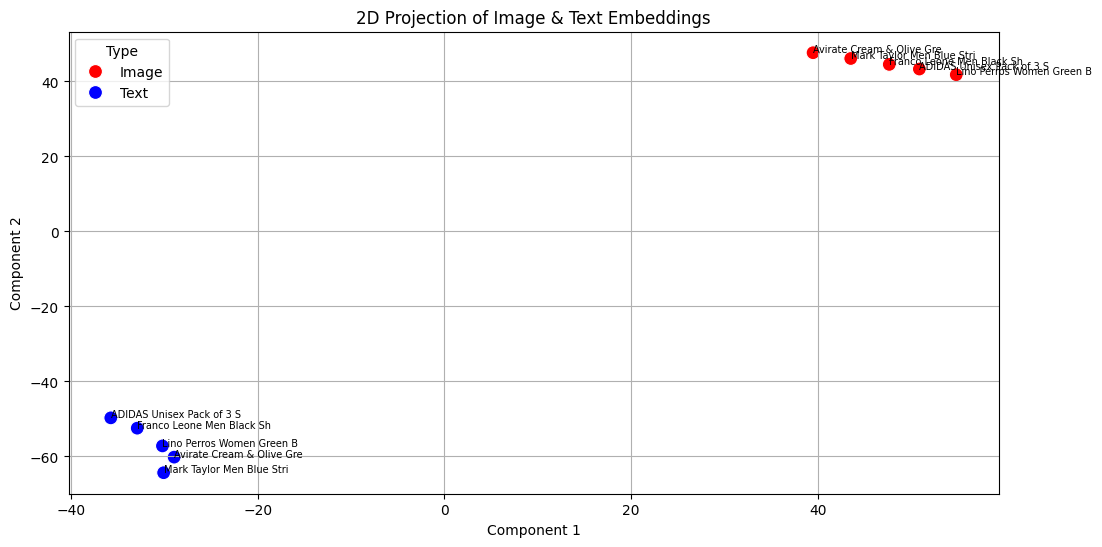

In [ ]:
image_embs2 = fclip_cust.encode_images(sample_image_paths)
text_embs2 = fclip_cust.encode_text(sample_captions)
plot_embedding_projection(image_embs2,text_embs2,sample_captions)

## generating 2d visual embeddings for all the

In [ ]:
val_datas

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,caption
857,16501,Men,Apparel,Topwear,Tshirts,Brown,Fall,2011.0,Casual,Locomotive Men Printed Brown TShirt
27883,47675,Women,Apparel,Dress,Dresses,Black,Summer,2012.0,Casual,Femella Women Black Animal Printed Dress
11397,38935,Girls,Apparel,Bottomwear,Leggings,Black,Summer,2012.0,Casual,Gini and Jony Girls Black Leggings
39803,48338,Women,Accessories,Jewellery,Necklace and Chains,Silver,Fall,2012.0,Casual,Pitaraa Silver Beaded Sheet Necklace
19173,22146,Men,Footwear,Shoes,Formal Shoes,Black,Summer,2011.0,Formal,Lee Cooper Men Black Formal Shoes
...,...,...,...,...,...,...,...,...,...,...
8767,39637,Men,Footwear,Shoes,Sports Shoes,White,Summer,2012.0,Sports,Lotto Men White Sports Shoes
10163,46767,Women,Personal Care,Fragrance,Perfume and Body Mist,Cream,Spring,2017.0,Casual,Paco Rabanne Women Pour Perfume
37533,48888,Women,Accessories,Jewellery,Pendant,Silver,Summer,2015.0,Casual,Lucera Women Silver Pendant
43604,51612,Women,Apparel,Bottomwear,Leggings,Grey,Summer,2012.0,Casual,Kraus Jeans Women Grey leggings
